In [21]:
import numpy as np
import pandas as pd

df = np.array([
[0.730875576036866, 	0.765345622119815, 	0.749308755760368 ,	0.767281105990783, 	0.750138248847926, 	0.774101382488479], 
[0.716138908605511, 	0.743595923426525, 	0.704066499538197 ,	0.712497219073448, 	0.667710779786251, 	0.709475278887205], 
[0.551621522019532, 	0.659311334817895, 	0.598304772434125 ,	0.686843559977888, 	0.620692832135618, 	0.768933112216694], 
[0.746887966804979, 	0.783858921	     ,  0.630000000000000 , 0.677000000000000, 	0.722063242237802, 	0.760468831974054], 
[0.713062524890481, 	0.722974093986459, 	0.515000000000000 ,	0.640000000000000, 	0.546629950170469, 	0.688749016522423], 
[0.709235209235209, 	0.715000000000000, 	0.610000000000000 ,	0.729235642135642, 	0.634776334776334, 	0.739898989898990], 
[0.765304997550220, 	0.726188140000000, 	0.754011750000000 ,	0.745302550000000, 	0.708096283470410, 	0.750011576396499], 
[0.567330488383120, 	0.607746020000000, 	0.548545200000000 ,	0.566171430000000, 	0.500000000000000, 	0.615594100888218], 
[0.839851169858544, 	0.813298080000000, 	0.808806740000000 ,	0.820699900000000, 	0.765265466917360, 	0.821100298138043]],dtype='f')


In [22]:
data = pd.DataFrame(df, 
columns = ['Base','SMOTE','FS','SMOTE+FS','CNN','CNN+SMOTE'], 
index = ['Ecoli-ceftriaxone','Ecoli-ciprofloxacin','Ecoli-cefepime','Kpneu-cefepime',"Kpneu-ciprofloxacin",'Kpneu-ceftriaxone','Saureus-ciprofloxacine','Saureus-fusidic',"Saureus-oxacillin"])

In [23]:
# normalize by row
t_data = data.T
max_ = t_data.max()
max_
t_data /= max_
t_data
# return
t_t_data = t_data.T
t_t_data['drug'] = ['ceft','cipro','cefe','cefe','cipro','ceft','cipro','fus','oxa']
t_t_data['patho']=['ecoli','ecoli','ecoli','K','K','K',"S",'S','S']
t_t_data

,Base,SMOTE,FS,SMOTE+FS,CNN,CNN+SMOTE,drug,patho
Ecoli-ceftriaxone,0.944160,0.988689,0.967972,0.991189,0.969044,1.000000,ceft,ecoli
Ecoli-ciprofloxacin,0.963075,1.000000,0.946840,0.958178,0.897948,0.954114,cipro,ecoli
Ecoli-cefepime,0.717386,0.857437,0.778097,0.893242,0.807213,1.000000,cefe,ecoli
Kpneu-cefepime,0.952835,1.000000,0.803716,0.863676,0.921165,0.970160,cefe,K
Kpneu-ciprofloxacin,0.986291,1.000000,0.712335,0.885232,0.756085,0.952661,cipro,K
Kpneu-ceftriaxone,0.958557,0.966348,0.824437,0.985588,0.857923,1.000000,ceft,K
Saureus-ciprofloxacine,1.000000,0.948887,0.985243,0.973863,0.925247,0.980017,cipro,S
Saureus-fusidic,0.921598,0.987251,0.891083,0.919715,0.812223,1.000000,fus,S
Saureus-oxacillin,1.000000,0.968384,0.963036,0.977197,0.911192,0.977674,oxa,S


In [30]:
# wilcoxon rank sum 
from scipy.stats import ranksums
from statsmodels.sandbox.stats.multicomp import multipletests
sample1 = t_t_data['Base']
p = list()
for i in np.arange(1,6):
    sample2 = t_t_data.iloc[:,i]
    res = ranksums(sample1, sample2)
    pvalue = res[1]
    p = p+[pvalue]
p_adj = multipletests(p, alpha=0.05, method='bonferroni')
p_adj

(array([False, False, False, False, False]),
 array([1.        , 0.72560179, 1.        , 0.1217046 , 0.72560179]),
 0.010206218313011495,
 0.01)

In [26]:
values= pd.DataFrame(t_t_data.median(axis=0), columns=["Median"])
values
t_t_data.quantile([0.25,0.5,0.75], axis = 0).round(2)

/var/folders/s2/yhnq83_56gv82yv_1ljbgf9h0000gn/T/ipykernel_18726/2413630002.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  values= pd.DataFrame(t_t_data.median(axis=0), columns=["Median"])


,Base,SMOTE,FS,SMOTE+FS,CNN,CNN+SMOTE
0.25,0.94,0.97,0.80,0.89,0.81,0.97
0.50,0.96,0.99,0.89,0.96,0.90,0.98
0.75,0.99,1.00,0.96,0.98,0.92,1.00


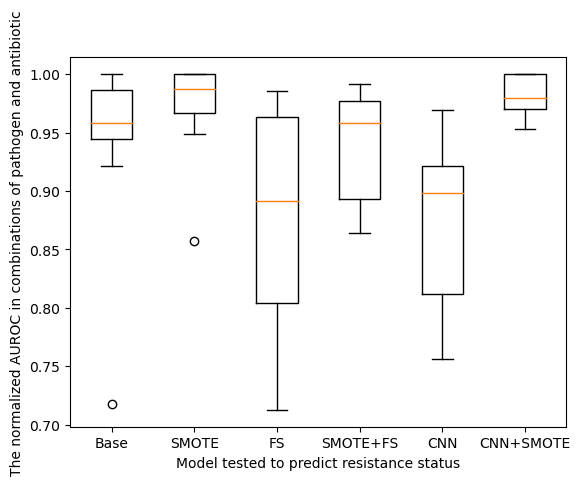

In [32]:
plt.boxplot(t_t_data.iloc[:,0:6] )
plt.xticks([1,2,3,4,5,6],t_t_data.iloc[:,0:6].columns)
plt.xlabel("Model tested to predict resistance status")
plt.ylabel("The normalized AUROC in combinations of pathogen and antibiotic")
plt.savefig('fig_finalbox.pdf')